In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('bridge_shadow.jpg')

def print_channels(title, channels):

    if len(channels.shape) > 2:
        total_channels = channels.shape[2]

        f, ax = plt.subplots(1, total_channels, figsize=(20,10))
        f.suptitle('{} - {} channels'.format(title, total_channels))

        for c in range(total_channels):
            channel = channels[:,:,c]
            ax[c].imshow(channel, cmap='gray')
            ax[c].set_title(c)
    else:
        f, ax = plt.subplots(1, 1, figsize=(20,10))
        f.suptitle('{} - {} channels'.format(title, 1))
        ax.imshow(channels, cmap='gray')
        ax.set_title(0)
        
    print(title, 'Max: ', np.max(channels, axis=(0,1)))
    f.tight_layout()

def print_using_all():
    #conversions = ['cv2.' + i for i in dir(cv2) if i.startswith('COLOR_RGB2') and not i.endswith('_FULL')]
    #print(conversions)
    conversions = ['cv2.COLOR_RGB2BGR555', 'cv2.COLOR_RGB2BGR565',
                   'cv2.COLOR_RGB2HLS', 'cv2.COLOR_RGB2HSV', 'cv2.COLOR_RGB2LAB', 'cv2.COLOR_RGB2LUV', 
                   'cv2.COLOR_RGB2RGBA', 'cv2.COLOR_RGB2XYZ', 'cv2.COLOR_RGB2YCR_CB', 
                   'cv2.COLOR_RGB2YUV', 'cv2.COLOR_RGB2YUV_IYUV',
                   'cv2.COLOR_RGB2YUV_YV12']    
    
    for i in conversions:
        channels = cv2.cvtColor(img, eval(i))
        print_channels(i, channels)

print_using_all()
plt.show()


HLS Max:  [ 180.  255.  255.]
luv Max:  [ 255.  165.  214.]
yuv Max:  [ 255.  183.  168.]
LAB Max:  [ 255.  181.  203.]
ycr Max:  [ 255.  192.  165.]


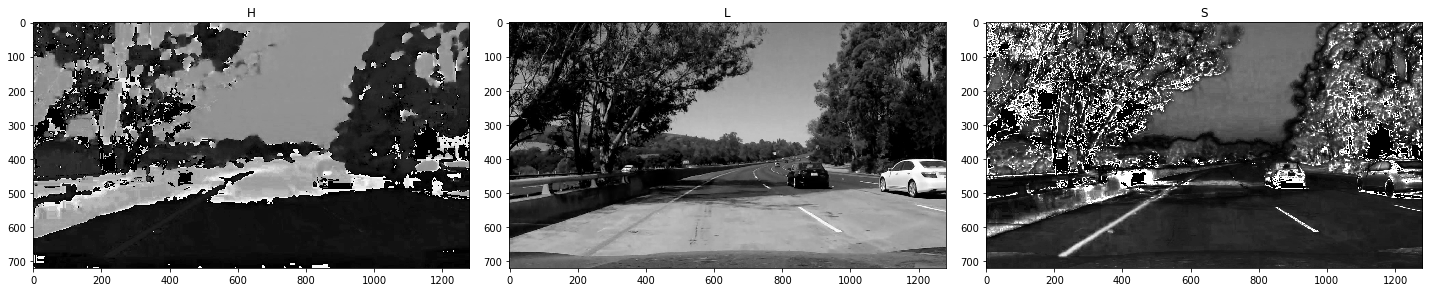

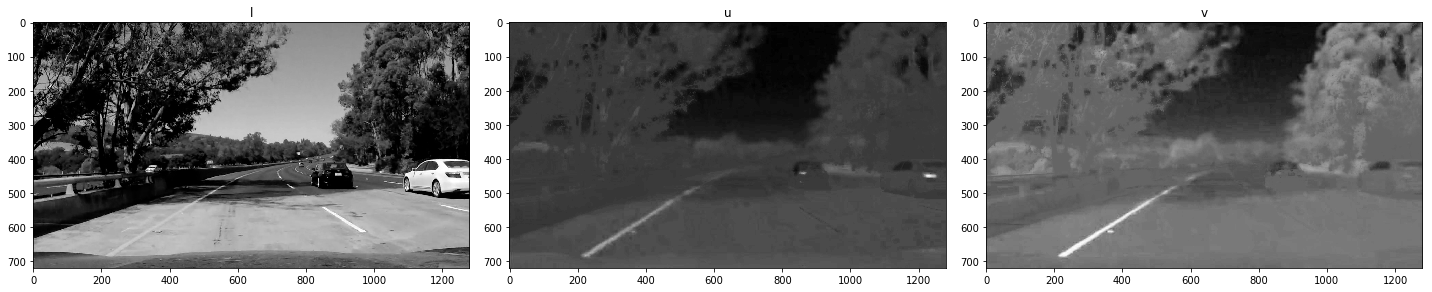

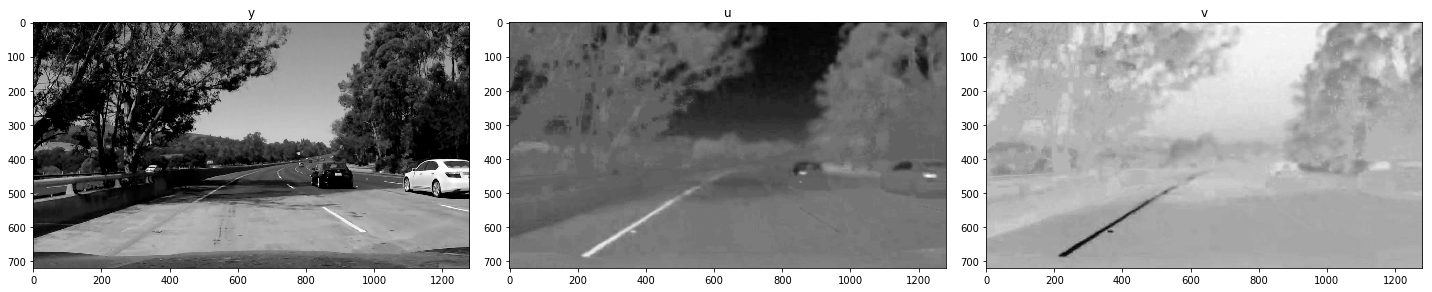

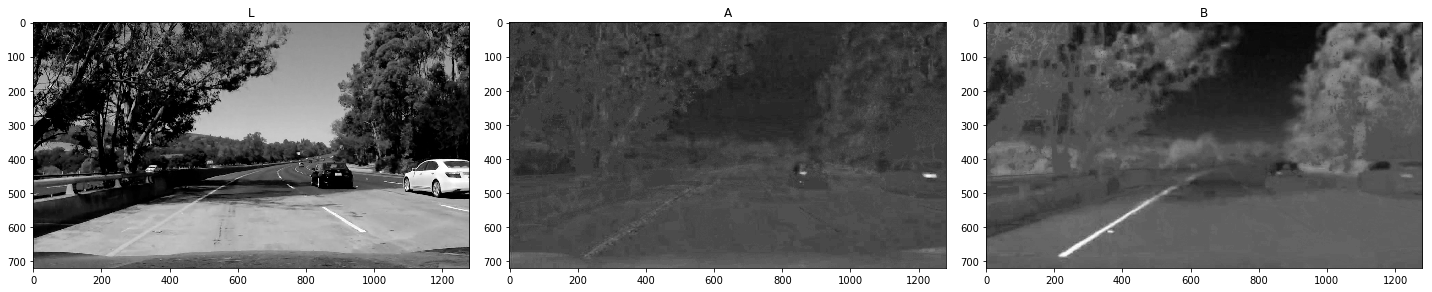

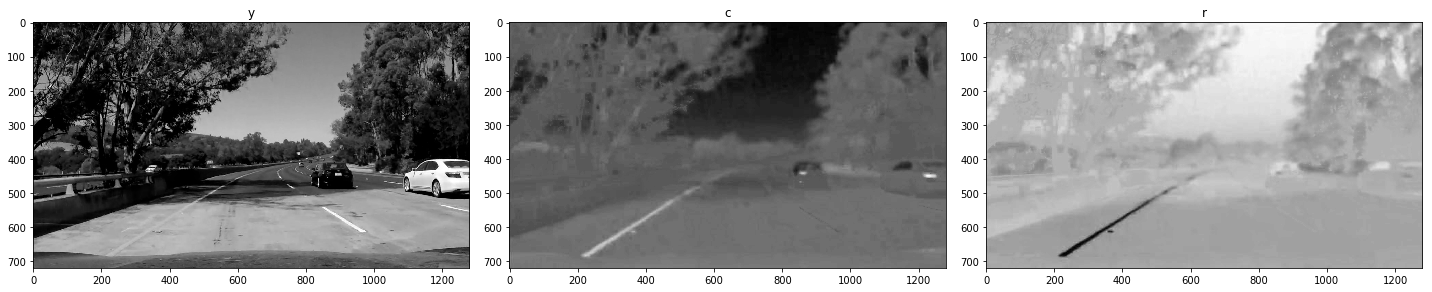

Using HLS


In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('bridge_shadow.jpg')

def print_channels(title, channels):
    a = channels[:,:,0]
    b = channels[:,:,1]
    c = channels[:,:,2]

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    
    ax1.imshow(a, cmap='gray')
    ax1.set_title(title[0])
    
    ax2.imshow(b, cmap='gray')
    ax2.set_title(title[1])
    
    ax3.imshow(c, cmap='gray')
    ax3.set_title(title[2])

    print(title, 'Max: ', np.max(channels, axis=(0,1)))
    f.tight_layout()

def print_using_all():
    conversions = [i for i in dir(cv2) if i.startswith('COLOR_RGB2') and not i.endswith('_FULL')]
    print(conversions)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
print_channels('HLS', hls)

luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV).astype(np.float)
print_channels('luv', luv)

yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV).astype(np.float)
print_channels('yuv', yuv)

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB).astype(np.float)
print_channels('LAB', lab)

ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB).astype(np.float)
print_channels('ycr', ycbcr)

plt.show()

print('Using HLS')
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

a calcuated


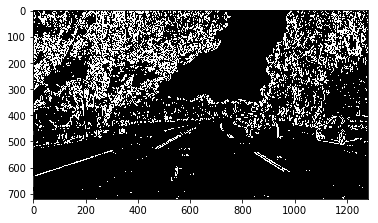

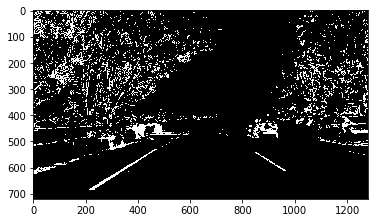

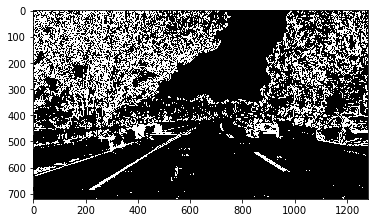

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('bridge_shadow.jpg')

def diff_image(image):
    target_color = [225, 225, 225]
    square = np.sqrt(np.sum(np.square(target_color))) 
    diff_image = np.sqrt(np.sum(np.square(image - target_color), axis=2))
    diff_image = 255 - (diff_image / square * 255).astype(np.uint8)
    return cv2.GaussianBlur(diff_image, (3,3), 0)

def pipeline(img):
    ksize = 11
    other = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h = other[:,:,0]
    l = other[:,:,1]
    s = other[:,:,2]

    sobelx = cv2.Sobel(l, cv2.CV_64F, 1, 0, ksize=ksize)
    abs_sobelx = np.abs(sobelx)
    norm_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))

    grad_thresh = (20, 100)

    mask = (norm_sobelx >= grad_thresh[0]) & (norm_sobelx <= grad_thresh[1])
    grad_binary = np.zeros_like(norm_sobelx)
    grad_binary[mask] = 1

    plt.figure()
    plt.imshow(grad_binary, cmap='gray')

    # use s_channel
    thresh = (170, 255)
    mask = (s >= thresh[0]) & (s <= thresh[1])
    binary = np.zeros_like(s)
    binary[mask] = 1
    
    plt.figure()
    plt.imshow(binary, cmap='gray')
    
    a = diff_image(img)
    print('a calcuated')
    plt.figure()
    plt.imshow(a, cmap='gray')
    
#     combined = np.dstack((a, binary * 255, grad_binary * 255))
    
#     print(combined.shape)
#     plt.figure()
#     plt.imshow(combined)
    
    combined = np.zeros_like(binary)
    combined[(binary == 1) | (grad_binary == 1)] = 1
    
    plt.imshow(combined, cmap="gray")
    
    return combined

img_lines = pipeline(img)
plt.show()

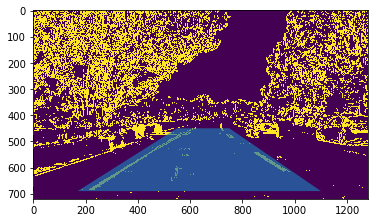

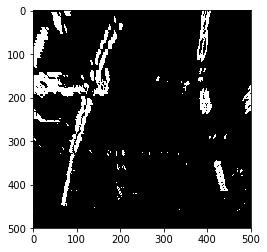

In [55]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import cv2

# src = np.float32([
#     [170,700],
#     [570,400],
#     [800,400],
#     [1100,700]
# ])

# top_y = 477
# tl_x = 581
# tr_x = 699
# br_x = 896
# bl_x = 384
# bot_y = 675

# top_y = 0
# tl_x = bl_x
# tr_x = br_x
# bot_y = 720

src = np.float32([
    [550,450],
    [750,450],
    [1100,690],
    [170,690],
])

img_size = 500,500

dst = np.float32([
    [50, 50],
    [img_size[0] - 50, 50],
    [img_size[0] - 50, img_size[1] - 50],
    [50, img_size[1] - 50],
])

img = img_lines

f,ax1 = plt.subplots(1,1)
ax1.imshow(img)
ax1.add_patch(patches.Polygon(src, closed=True, alpha=0.7))
plt.show()

M = cv2.getPerspectiveTransform(src, dst)

binary_warped = cv2.warpPerspective(img, M, img_size)

plt.imshow(binary_warped, cmap='gray')
plt.show()

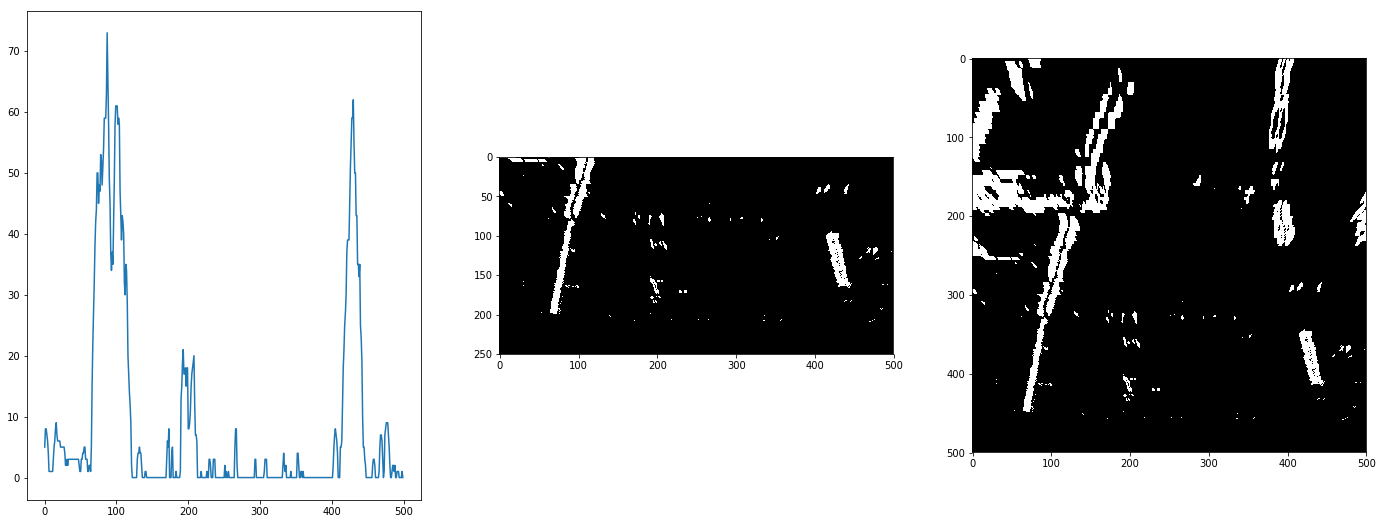

In [56]:
output_image = np.dstack((binary_warped, binary_warped, binary_warped)) * 255

lower = binary_warped[binary_warped.shape[0]//2:]
histogram = np.sum(lower, axis=0)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,9))
ax1.plot(histogram)
ax2.imshow(lower, cmap='gray')
ax3.imshow(output_image, cmap='gray')

plt.show()

87 430
Box Width/Height: 50, 71
left mid: 71
New left_mid: 70
New left_mid: 78
New left_mid: 91
New left_mid: 106
New left_mid: 108


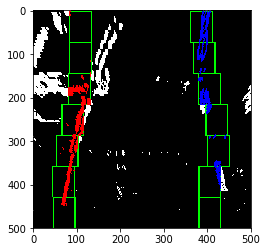

In [67]:
output_image = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
midpoint = histogram.shape[0] // 2

left = histogram[:midpoint]
right = histogram[midpoint:]

# f, (ax1, ax2) = plt.subplots(1,2)
# ax1.plot(left)
# ax2.plot(right)
# plt.show()

left_mid = np.argmax(left)
right_mid = np.argmax(right) + midpoint

print(left_mid, right_mid)

height = output_image.shape[0]
n_boxes = 7

box_width = 50
box_height = height // n_boxes

nonzero = np.nonzero(binary_warped)
y_nz = nonzero[0]
x_nz = nonzero[1]


box_y = height - (n+1) * box_height, height - n * box_height
box_x_left = left_mid - box_width // 2, left_mid + box_width // 2
box_x_right = right_mid - box_width // 2, right_mid + box_width // 2


left_ind = (y_nz >= box_y[0]) & (y_nz <= box_y[1]) & (x_nz >= box_x_left[0]) & (x_nz <= box_x_left[1])
right_ind = (y_nz >= box_y[0]) & (y_nz <= box_y[1]) & (x_nz >= box_x_right[0]) & (x_nz <= box_x_right[1])

# reset left_mid and right_mid based on average in the lowest
if len(left_ind) > 50:
    left_mid = np.int(np.mean(x_nz[left_ind]))
        
if len(right_ind) > 50:
    right_mid = np.int(np.mean(x_nz[right_ind]))

print('Box Width/Height: {}, {}'.format(box_width, box_height))

all_left_ind = []
all_right_ind = []

print('left mid:', left_mid)

for n in range(n_boxes):
    box_y = height - (n+1) * box_height, height - n * box_height
    box_x_left = left_mid - box_width // 2, left_mid + box_width // 2
    box_x_right = right_mid - box_width // 2, right_mid + box_width // 2

    cv2.rectangle(output_image, (box_x_left[0], box_y[0]), (box_x_left[1], box_y[1]), (0,255,0), 2)
    cv2.rectangle(output_image, (box_x_right[0], box_y[0]), (box_x_right[1], box_y[1]), (0,255,0), 2)
    
    # find indices for left and right
    left_ind = (y_nz >= box_y[0]) & (y_nz <= box_y[1]) & (x_nz >= box_x_left[0]) & (x_nz <= box_x_left[1])
    right_ind = (y_nz >= box_y[0]) & (y_nz <= box_y[1]) & (x_nz >= box_x_right[0]) & (x_nz <= box_x_right[1])
    
    left_ind = left_ind.nonzero()[0]
    right_ind = right_ind.nonzero()[0]
    
    all_left_ind.append(left_ind)
    all_right_ind.append(right_ind)
  
    if len(left_ind) > 50:
        left_mid = np.int(np.mean(x_nz[left_ind]))
        print('New left_mid:', left_mid)
        
    if len(right_ind) > 50:
        right_mid = np.int(np.mean(x_nz[right_ind]))

all_left_ind = np.concatenate(all_left_ind)
all_right_ind = np.concatenate(all_right_ind)

output_image[y_nz[all_left_ind], x_nz[all_left_ind]] = [255,0,0]
output_image[y_nz[all_right_ind], x_nz[all_right_ind]] = [0,0,255]
    
plt.imshow(output_image)
plt.show()

[ -5.53710664e-04   1.80265161e-01   9.42850543e+01]


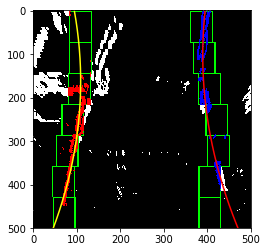

In [70]:
leftx = x_nz[all_left_ind]
lefty = y_nz[all_left_ind]
rightx = x_nz[all_right_ind]
righty = y_nz[all_right_ind]


left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print(left_fit)

ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
left_x = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
right_x = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

plt.imshow(output_image)
plt.plot(left_x, ploty, color='yellow')
plt.plot(right_x, ploty, color='red')
plt.show()


(19287,)


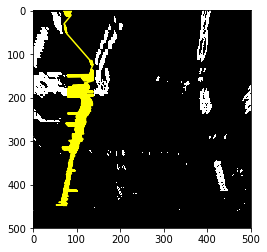

In [87]:
binary_warped = cv2.warpPerspective(img, M, img_size)

nz = binary_warped.nonzero()
nz_y = nz[0]
nz_x = nz[1]

margin = 30

left_pts = left_fit[0] * (nz_y ** 2) + left_fit[1] * nz_y + left_fit[2]
left_margin = left_pts - margin, left_pts + margin
print(left_margin[0].shape)
left_ind = (nz_x >= left_margin[0]) & (nz_x <= left_margin[1])

left_x = nz_x[left_ind]

#ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])

plt.imshow(binary_warped, cmap='gray')
plt.plot(left_x, nz_y[left_ind], color='yellow')
plt.show()


(1, 500, 2)
(1, 500, 2)


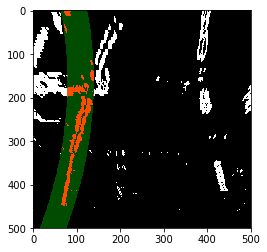

In [131]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nz_y[left_ind], nz_x[left_ind]] = [255, 0, 0]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.dstack((left_fitx-margin, ploty))
print(left_line_window1.shape)
left_line_window2 = np.array([np.dstack((left_fitx+margin, ploty)).squeeze()[::-1]])
print(left_line_window2.shape)

left_line_pts = np.hstack((left_line_window1, left_line_window2))

cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))

result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

plt.imshow(result)
plt.show()

In [141]:
x = np.array([1,2,3])
y = np.array([10,20,30])
s = np.vstack((x, y))

#print(s)
#print(s.T)
first = np.dstack((x,y))
second = np.dstack((x[::-1],y[::-1]))

print(first)
print(second)
print(np.hstack((first, second)))


[[[ 1 10]
  [ 2 20]
  [ 3 30]]]
[[[ 3 30]
  [ 2 20]
  [ 1 10]]]
[[[ 1 10]
  [ 2 20]
  [ 3 30]
  [ 3 30]
  [ 2 20]
  [ 1 10]]]


## Convolution

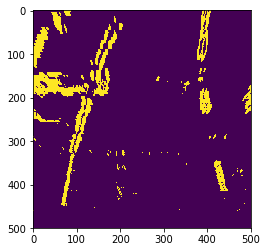

375 250


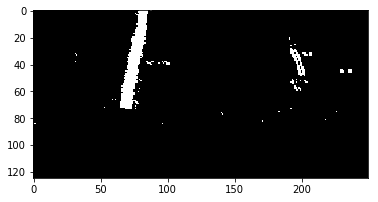

[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  5 15 19 23 28 34 40 44 50 50
 44 45 43 44 42 36 32 26 22 15  5  1  3  3  1  0  0  0  1  1  0  2  1  1  3
  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2  8 10  9 11 14 14 14 15
  8  8  9  5  2  0  3  3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  1  0  0  3  3  2  0  0  0  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0]
Convolve [   0.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    3.    4.    4.    4.    4.
    4.    4

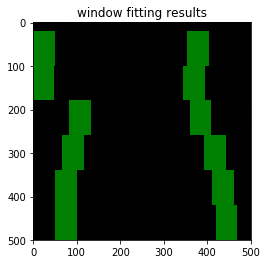

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
#warped = mpimg.imread('warped_example.jpg')
warped = binary_warped

# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),
           max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions

    plt.imshow(image)
    plt.show()

    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    
    print(int(3*warped.shape[0]/4),int(warped.shape[1]/2))
    plt.imshow(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], cmap='gray')
    plt.show()
    
    print(l_sum)
    print('Convolve', np.convolve(window,l_sum))
                      
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


In [149]:
x = [3, 4]
y = [1,2,4,5,6,7]
print(np.convolve(x,y))

[ 3 10 20 31 38 45 28]
